In [1]:
%pylab inline

import pandas
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
import math

size = 100
grid = np.arange(1, size +1)
gamma = 0.95

Populating the interactive namespace from numpy and matplotlib


In [2]:
s = sps.norm.rvs(size=100)

In [3]:
# функция для построения графика
def build_graph(down, up, title):
    fig = plt.figure(figsize=(20, 10))
    plt.grid(True)
    plt.title(title, fontsize=15)
    ax = fig.gca()
    plt.fill_between(grid, down, up, color='red')
    ax.set_xlim(1, size)
    ax.set_ylim(down.mean() - 3, up.mean() + 3)
    plt.show()

# $a$ при известном $\sigma^2$

Доверительный интервал: $(\overline{X} - \frac{\tau_{1 - \frac{\gamma}{2}} \sigma}{\sqrt{n}}, \overline{X} + \frac{\tau_{1 - \frac{\gamma}{2}} \sigma}{\sqrt{n}})$, где $\tau_{1 - \frac{\gamma}{2}}$ - квантиль уровня $(1 - \frac{\gamma}{2})$ стандартного нормального распредления

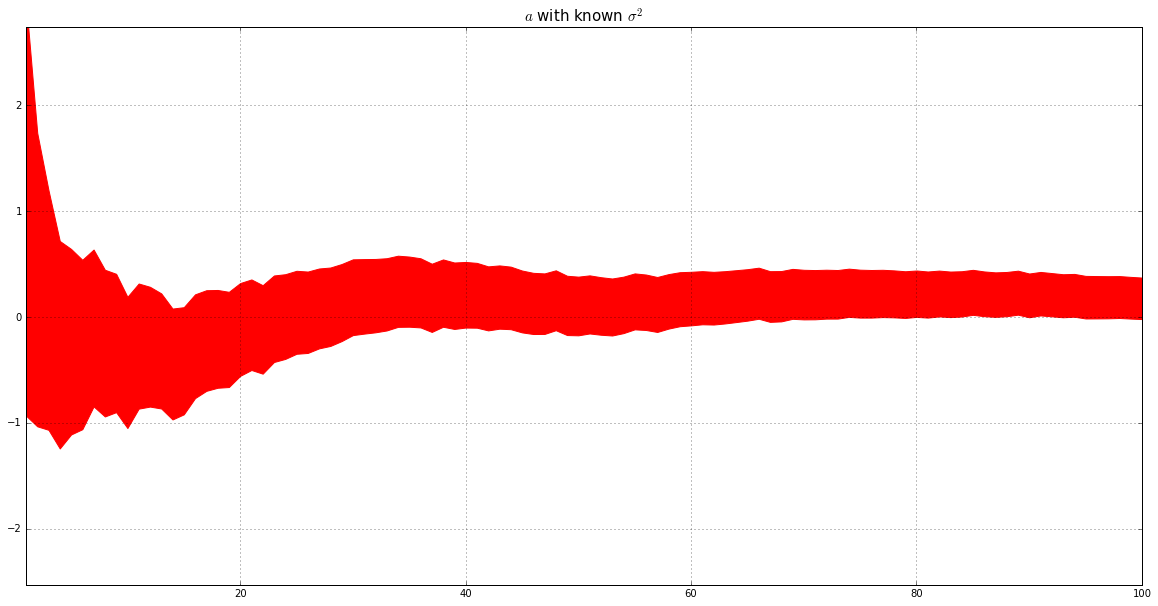

In [4]:
average = s.cumsum() / np.arange(1, size + 1)
tau = sps.norm.ppf(0.5 - gamma / 2)

build_graph(average - tau / (np.arange(1, size + 1)**0.5),
            average + tau / (np.arange(1, size + 1)**0.5),
           '$a$ with known $\sigma^2$')

# $\sigma^2$ при известном $a$

Доверительный интервал: $(\frac{N \overline{(X - a)^2}}{\chi^2_{(\frac{1 + \gamma}{2}, N)}}, \frac{N \overline{(X - a)^2}}{\chi^2_{(\frac{1 - \gamma}{2}, N)}})$, где $\chi^2_{(p, N)}$ - квантиль уровня 𝑝 распределения хи-квадрат с 𝑁 степенью свободы

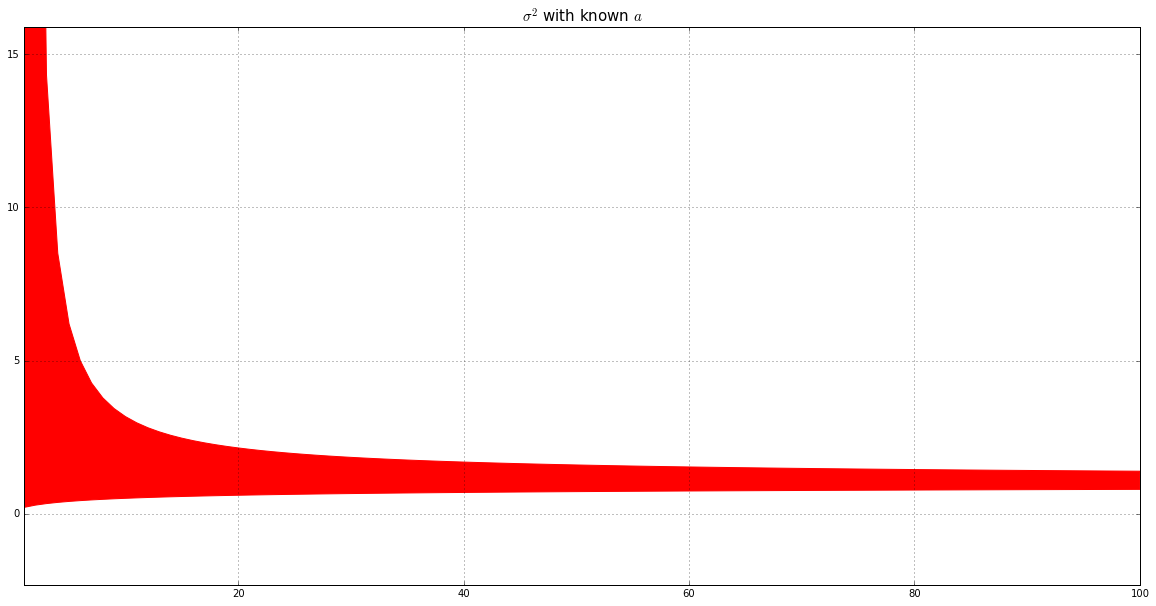

In [5]:
chi1 = sps.chi2(np.arange(1, size + 1)).ppf(0.5 + gamma/2)
chi2 = sps.chi2(np.arange(1, size + 1)).ppf(0.5 - gamma/2)
mean = np.mean(s*s)

build_graph(np.arange(1, size+1) * mean / chi1,
            np.arange(1, size+1) * mean / chi2,
            '$\sigma^2$ with known $a$')

# $a$ при неизвестном $\sigma^2$

Доверительный интервал: $(\overline{X} - \frac{\tau_{(\frac{\gamma + 1}{2}, N-1)} S)}{\sqrt{N}}, \overline{X} + \frac{\tau_{(\frac{\gamma + 1}{2}, N-1)} S)}{\sqrt{N}})$, где $\tau_{p, N-1}$ - квантиль уровня 𝑝 распределения t-Стюдента с 𝑁 − 1 степенью свободы

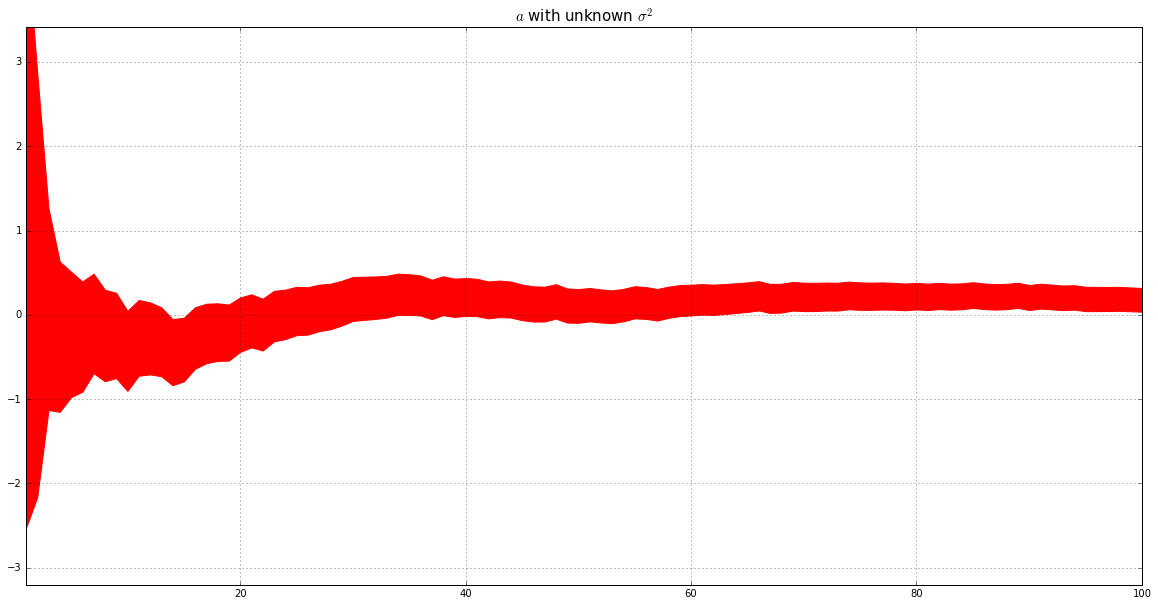

In [6]:
tau = sqrt(sps.t(np.arange(1, size + 1) - 1).ppf(0.5 + gamma / 2))
tau[0] = tau[1] # при нулевой степени свободы нельзя посчитать квантиль 
s_ = sqrt(np.mean(s * s) - np.mean(s) ** 2)

build_graph(average - tau * s_ / (np.arange(1, size + 1) ** 0.5), 
            average + tau * s_ / (np.arange(1, size + 1) ** 0.5),
            '$a$ with unknown $\sigma^2$')

# $\sigma^2$ при неизвестном $a$

Доверительный интервал: $(\frac{(N-1) S^2}{\chi^2_{(\frac{1+\gamma}{2}, N-1)}}, \frac{(N-1) S^2}{\chi^2_{(\frac{1-\gamma}{2}, N-1)}})$

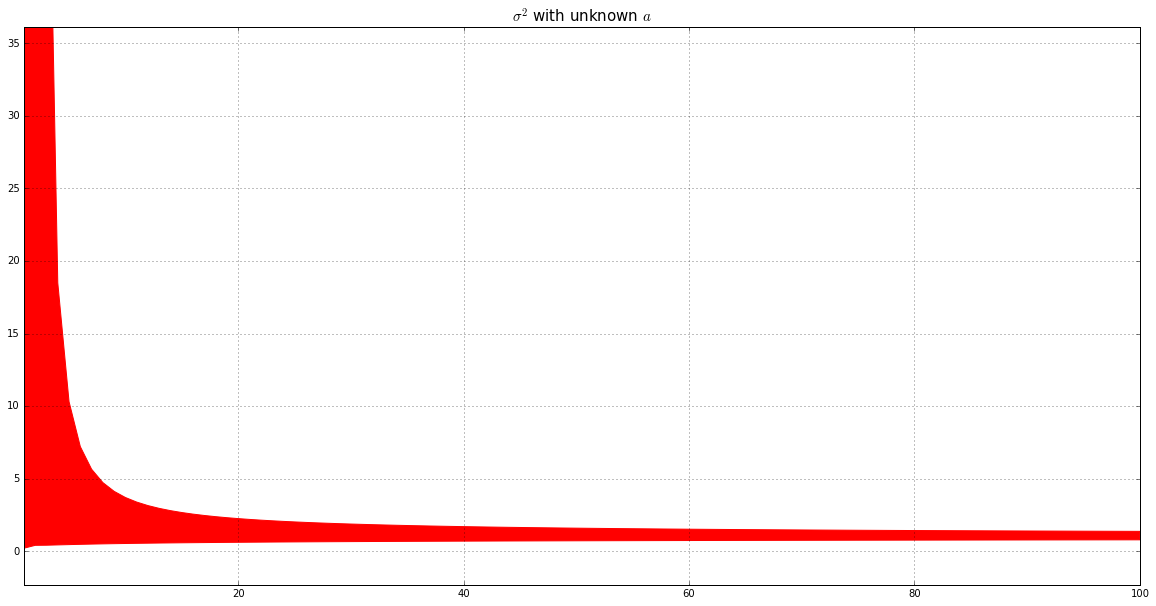

In [7]:
s_sq = s_**2
chi1 = sps.chi2(np.arange(1, size+1) - 1).ppf(0.5 + gamma/2)
chi1[0] = chi1[1]
chi2 = sps.chi2(np.arange(1, size+1) - 1).ppf(0.5 - gamma/2)
chi2[0] = chi2[1]

build_graph(np.arange(1, size + 1) * s_sq / chi1,
            np.arange(1, size + 1) * s_sq / chi2,
            '$\sigma^2$ with unknown $a$')

# Доверительная область для $(a, \sigma^2)$

Доверительная область: $(\overline{X} - \sqrt{\frac{s^2z_1}{z_2}}, \overline{X} + \sqrt{\frac{s^2z_1}{z_2}})\times(0, \frac{Ns^2}{z_2})$, где $z_1$ - квантиль уровня $\sqrt{\alpha}$ распределения $\chi^2(1)$, $z_2$ - квантиль уровня $1 - \sqrt{\alpha}$ распределения $\chi^2(N - 1)$

Построим только для N=100

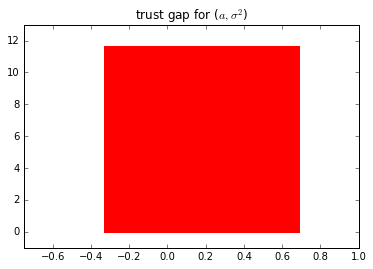

In [18]:
down_a = np.mean(s) - sqrt(s_sq * sps.chi(1).ppf(sqrt(gamma)) / sps.chi(size - 1).ppf(1 - sqrt(gamma)))
up_a = np.mean(s) + sqrt(s_sq * sps.chi(1).ppf(sqrt(gamma)) / sps.chi(size - 1).ppf(1 - sqrt(gamma)))
down_sigma = np.zeros(size)
up_sigma = [size*s_sq / sps.chi(size - 1).ppf(1 - sqrt(gamma)) for x in grid]
plt.fill_between(np.linspace(down_a, up_a, size), down_sigma, up_sigma, color='red')
plt.xlim((-0.75, 1))
plt.ylim((-1, 13))
plt.title('trust gap for ($a, \sigma^2$)')
plt.show()